/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: overflow encountered in exp
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: divide by zero encountered in log10
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: invalid value encountered in log10
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: overflow encountered in exp
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: divide by zero encountered in log10
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956/4231361762.py:26: RuntimeWarning: invalid value encountered in log10
  return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))
/tmp/ipykernel_1798956


Optimal parameters before stability test for Ni$_{90}$Fe$_{10}$/CeO$_2$:
A = 0.14971447612329733
B = 45419.395042519725
E_0 = 1.280928678509
alpha = 0.5402631602675472

Optimal parameters before stability test for Ni$_{90}$Fe$_{10}$/TiO$_2$:
A = 0.005691844018931529
B = -245.94776343710132
E_0 = 1.3438004825679084
alpha = 0.22355429108390618

Optimal parameters before stability test for Ni$_{90}$Fe$_{10}$/ZrO$_2$:
A = 0.2336679187786532
B = 982569.985749538
E_0 = 1.272893620263984
alpha = 0.6426491840596118


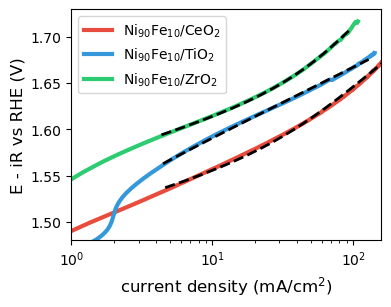

In [1]:
import pandas as pd 
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt

length = 4
height = 3

fig, ax = plt.subplots(figsize=(length, height))

label_font = 12
legend_font = 10

tick_font = 12
plt.rcParams['xtick.labelsize'] = tick_font
plt.rcParams['ytick.labelsize'] = tick_font

R = 8.314  # Universal gas constant in J/(mol*K)
T = 298.15  # Temperature in Kelvin

# y is potential in the following
# polarization curve equation
def polarization_curve(y, A, B, C, alpha):
    exponent_1 = (1 - alpha) * (y - C) * 96485 / (R * T)
    exponent_2 = - (y - C) * 96485 / (R * T)
    return np.log10(A * np.exp(exponent_1) / (1 + B * np.exp(exponent_2)))

def polarization_curve_oxide(y, A, B, C):
    exponent = -1 * (y - C) * 96485 / (R * T)
    return np.log10(A  / (1 + B * np.exp(exponent))**2)

fit_min_val = 3.9

filenames=[['Activity_1/CeO2_Activity_1.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c', 3.9]]

for filename, label, color, fit_min_val in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098) #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    #iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*6.48*0.001

    y_data = voltage[0:voltage.argmax()] #- 1.23
    x_data = current_density[0:voltage.argmax()]

    # Initial guesses for parameters A, B, alpha
    initial_guesses = [1, 1, 1.23, 0.5]

    # Fit the data to the polarization curve equation
    popt, pcov = curve_fit(polarization_curve, y_data[x_data > fit_min_val], np.log10(x_data[x_data > fit_min_val]), p0=initial_guesses)

    A_fit, B_fit, C_fit, alpha_fit = popt

    y_fit = np.linspace(0.28, max(y_data), 200)
    x_fit = polarization_curve(y_fit, A_fit, B_fit, C_fit, alpha_fit)

    x_fit_min = np.log10(fit_min_val)
    x_fit_max = np.log10(np.max(x_data))
    
    ax.plot(x_data, y_data, label=label, linewidth=3, color = color, zorder =0)
    ax.plot(10**x_fit[(x_fit > x_fit_min) & (x_fit < x_fit_max)], y_fit[(x_fit > x_fit_min) & (x_fit < x_fit_max)], color='black', linewidth=2, linestyle = '--', zorder = 1)
    print(f'\nOptimal parameters before stability test for {label}:\nA = {A_fit}\nB = {B_fit}\nE_0 = {C_fit}\nalpha = {alpha_fit}')

filenames=[['Activity_1/TiO2_Activity_1.mpt','Ni$_{90}$Fe$_{10}$/TiO$_2$','#3498db',5.0, 3.9],\
    ['Activity_1/ZrO2_Activity_1.mpt','Ni$_{90}$Fe$_{10}$/ZrO$_2$','#2ecc71',5.0, 3.9]]

for filename, label, color, resistance, fit_min_val in filenames:
    data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=61, encoding='ISO-8859-1')

    data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=61, encoding='ISO-8859-1')
    voltage = np.array(data[['Ewe/V']]+0.059*14+0.098) #voltage in V
    current_density=np.array(data[['<I>/mA']]/0.196) # current density in mA/cm^2

    #iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*resistance*0.001

    y_data = voltage[0:voltage.argmax()] #- 1.23
    x_data = current_density[0:voltage.argmax()]

    # Initial guesses for parameters A, B, alpha
    initial_guesses = [1, 1, 1.23, 0.5]

    popt, pcov = curve_fit(polarization_curve, y_data[x_data > fit_min_val], np.log10(x_data[x_data > fit_min_val]), p0=initial_guesses)

    A_fit, B_fit, C_fit, alpha_fit = popt

    y_fit = np.linspace(0.28, max(y_data), 200)
    x_fit = polarization_curve(y_fit, A_fit, B_fit, C_fit, alpha_fit)

    x_fit_min = np.log10(fit_min_val)
    x_fit_max = np.log10(np.max(x_data))
    
    ax.plot(x_data, y_data, label=label, linewidth=3, color = color, zorder =0)
    ax.plot(10**x_fit[(x_fit > x_fit_min) & (x_fit < x_fit_max)], y_fit[(x_fit > x_fit_min) & (x_fit < x_fit_max)], color='black', linewidth=2, linestyle = '--', zorder = 1)
    print(f'\nOptimal parameters before stability test for {label}:\nA = {A_fit}\nB = {B_fit}\nE_0 = {C_fit}\nalpha = {alpha_fit}')



ax.set_xlim(10**0,10**2.2)
ax.set_ylim(1.48,1.73)
ax.set_xscale('log')
ax.set_xlabel(r'current density (mA/cm$^2$)', fontsize = label_font)
ax.set_ylabel('E - iR vs RHE (V)', fontsize = label_font)

ax.legend(loc = 'upper left', fontsize = legend_font)
fig.savefig('fig_polarization_fit.pdf',dpi=300, bbox_inches='tight')
plt.show()